In [32]:
import time
import itertools as it

import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
from IPython import display

from Node.functions import *
from Node.Node import Control_node
from Plant.Plant import Plant
# from sklearn.preprocessing import normalize

### Behavior Size = 10 Features

In [72]:
# behavioral matrix (maps previous behavior to future behavior commands - how should I behave?)
# behavioral matrix (maps previous behavior to future behavior commands - how should I behave?)
B1 = np.random.rand(10, 10)
B2 = np.random.rand(10, 10)

# state/system matrix (maps previous state to future state - how will others behave (give past behaviors)?)
A1 = np.random.rand(10, 10)
A2 = np.random.rand(10, 10)

# reference matrix (how do I expect/want others to behave? target values)
R1 = np.random.rand(1, 10)
R2 = np.random.rand(1, 10)

# Initial behavior
behav_1 = np.random.rand(1, 10)
behav_2 = np.random.rand(1, 10)

# transition matrix (maps control signal and previous state to current state - what behaviors do I enact given my intentions?)
T1 = np.array([0.2])
T2 = np.array([0.2])

color2 = [0.1,0.6,0.2, 0.7]
color2c = [0.2,0.9,0.3, 0.4]

# get the state observation (behaviors of others)
def sense(inputs):
    perception = inputs
    return perception

# contrast reference with observations (and potentially incorporate predictions from internal model)
def compare(sensory_signal, reference, prediction):
    error = reference - sensory_signal
    return error

# generate a control signal
def control(error, behavioral_model, previous_output):
    control_signal = chaotic_controller(behavioral_model, 0.01, error)
    return control_signal

# dictates how control commands determine state transitions - i.e. behaviors
def transition(control_signal, transition_matrix, state):
    new_state = (transition_matrix * control_signal) + state
    new_state[new_state > 1] = 1
    new_state[new_state < 0] = 0
    return new_state


# adjusts behavioral model to get closer to behavior given 
def control_update(error, behavioral_model, previous_output):
    # LMS algorithm
    learning_rate = 0.0
    #behavioral_model = behavioral_model + learning_rate * error * previous_output
    return behavioral_model

# adjusts reference given error
def reference_update_true(reference, error):
    k = 0.1
    reference = reference - (error * k)
    reference[reference > 1] = 1
    reference[reference < 0] = 0
    return reference

def reference_update_sigmoid(reference, error):
    # reference = (matrix_sigmoid(error)-1)*(R1) + matrix_sigmoid(error)*(reference + error)
    sqr_error = np.square(error)
    avg_absolute_error = np.average(sqr_error)
    reference = shifted_sigmoid(avg_absolute_error, 1000, 50)*(reference - (error*0.3)) + (1-shifted_sigmoid(avg_absolute_error, 1000, 50))*(R1)
    # k = 0.1
    # k =  zero_sigmoid(error)
    # reference = reference - (error * k)
    return reference

def reference_update_false(reference, error):
    k = 0
    reference = reference + (error * k)
    return reference

# generate predictions on next state
def imc(system_estimate, previous_state, behavioral_model, previous_output):
    # actual estimate
    state = (system_estimate * previous_state) + (behavioral_model * previous_output)
    return state

# adjust system estimate to infer observations given my behavior
def imc_update(inputs, system_estimate, previous_behavior, behavioral_model, previous_state, learning_rate):
    # actual estimate
    #curr_system_est = (system_estimate @ previous_state) + (behavioral_model @ previous_behavior)
    #error = curr_system_est - inputs
    #learning_rate = 0.01
    #system_estimate = system_estimate + learning_rate * error * previous_behavior
    return system_estimate

plant1 = Plant(transition_matrix=T1, transition_function=transition, state=behav_1)
plant2 = Plant(transition_matrix=T2, transition_function=transition, state=behav_2)

conformist1 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_true,
controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
system_estimate=A1, reference=R1, init_behavior=behav_1)

conformist2 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_true,
controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
system_estimate=A1, reference=R1, init_behavior=behav_1)

stubborn = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_false,
controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B2, 
system_estimate=A2, reference=R2, init_behavior=behav_2)

sigmoid_8_6 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_sigmoid,
controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
system_estimate=A1, reference=R1, init_behavior=behav_1)


 Sigmoid Model Agents (Error Relative to Expectation)


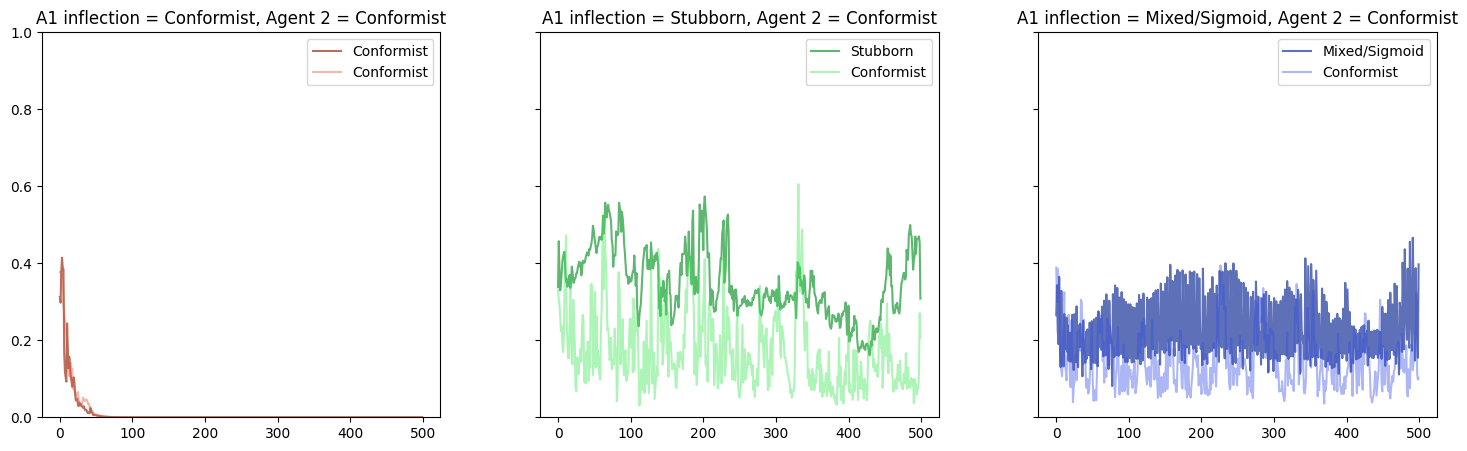

In [73]:
np.random.seed(33)
w = 6; h = 5
ncols = 3
nrows = 1
param_vals = [i for i in range(0, ncols*nrows)]
tups = list(it.product(range(nrows), range(ncols)))
agents_label = ["Conformist", "Stubborn", "Mixed/Sigmoid"]
agents1 = [conformist2, stubborn, sigmoid_8_6]
agents2 = [conformist1, conformist1, conformist1]
fig, ax = plt.subplots(nrows, ncols, figsize=(w*ncols, h*nrows), dpi=100,
                       sharey=True)#, sharex=True)
plt.subplots_adjust(wspace=0.25,hspace=0.45)
trials = 500
time = [i for i in range(trials)]


color1 = [0.6,0.2,0.1, 0.7]
color1c = [0.9,0.3,0.2, 0.4]
color2 = [0.1,0.6,0.2, 0.7]
color2c = [0.2,0.9,0.3, 0.4]
color3 = [0.1,0.2,0.6, 0.7]
color3c = [0.2,0.3,0.9, 0.4]
colors = [color1,color2,color3]
colors_c = [color1c,color2c,color3c]

agent1_pref_errors = []
agent2_pref_errors = []

for ix, param in enumerate(param_vals):
    # experiments
    conformist1 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_true,
    controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
    system_estimate=A1, reference=R1, init_behavior=behav_1)

    conformist2 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_true,
    controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
    system_estimate=A1, reference=R1, init_behavior=behav_1)

    stubborn = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_false,
    controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B2, 
    system_estimate=A2, reference=R2, init_behavior=behav_2)

    sigmoid_8_6 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_sigmoid,
    controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
    system_estimate=A1, reference=R1, init_behavior=behav_1)

    plant1 = Plant(transition_matrix=T1, transition_function=transition, state=np.random.rand(1, 10))
    plant2 = Plant(transition_matrix=T2, transition_function=transition, state=np.random.rand(1, 10))

    b1 = np.random.rand(1, 10)
    b2 = np.random.rand(1, 10)

    agent1 = agents1[param]
    agent2 = agents2[0]
    agent1_error = []
    agent2_error = []
    agent1_pref_error = []
    agent2_pref_error = []
    for t in range(trials):
        color1 = [0.1,0.2,0.8, (t+1)/(trials+1)]
        color2 = [0.1,0.8,0.2, (t+1)/(trials+1)]
        #pl.scatter(agent1.get_reference()[0],-0.03, c=color1, edgecolors=[0.8,0.1,0.1, color1[1]])
        #pl.scatter(agent2.get_reference()[0],0, c=color2, edgecolors=[0.8,0.1,0.1, color2[3]], linewidth=1.5)
        b1_control = agent1.go(b2)   
        b2_control = agent2.go(b1)

        # agent1_control.append(agent1.get_output())
        # agent2_control.append(agent2.get_output())

        b1 = plant1.transition(b1_control)
        b2 = plant2.transition(b2_control)
        
        # agent1_behaviors.append(b1)
        # agent2_behaviors.append(b2)

        # agent1_error.append(np.absolute(agent1.get_error()))
        # agent2_error.append(np.absolute(agent2.get_error()))
        agent1_error.append(np.sum(np.absolute(agent1.get_error()[0]))/len(agent1.get_error()[0]))
        agent2_error.append(np.sum(np.absolute(agent2.get_error()[0]))/len(agent2.get_error()[0]))
        agent1_pref_error.append(np.sum(np.absolute(R2-b1))/len(agent1.get_error()[0]))
        agent2_pref_error.append(np.sum(np.absolute(R1-b2))/len(agent2.get_error()[0]))

        # agent1_reference.append(agent1.get_reference()[0])
        # agent2_reference.append(agent2.get_reference()[0])
        
    agent1_pref_errors.append(agent1_pref_error)
    agent2_pref_errors.append(agent2_pref_error)
    
    ai = tups[ix][1]
    color = colors[param]
    color_c = colors_c[param]
    # plots
    ax[ai].plot(time, agent1_error, color=color, label=agents_label[param])
    ax[ai].plot(time, agent2_error, color=color_c, label="Conformist")
    ax[ai].set_title('A1 inflection = {}, Agent 2 = Conformist'.format(agents_label[param]))
    ax[ai].legend()
    # ax[ai].set_xlim(0,t)
    ax[ai].set_ylim(0,1)
    ax[ai].tick_params(axis='x')
    ax[ai].tick_params(axis='y')

print("\n Sigmoid Model Agents (Error Relative to Expectation)")
# print("Agent 1 base reference: {}".format(R1))
# print("Agent 2 base reference: {}".format(R2))
plt.show()


 Sigmoid Model Agents (Error Relative to PREFERENCE)


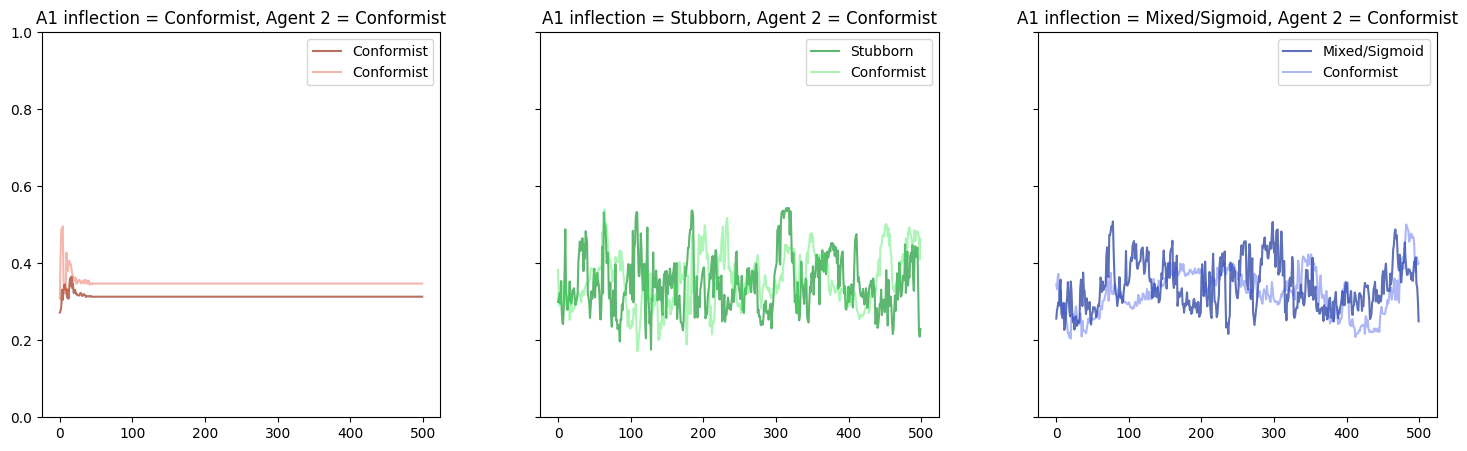

In [74]:

w = 6; h = 5
ncols = 3
nrows = 1
param_vals = [i for i in range(0, ncols*nrows)]
tups = list(it.product(range(nrows), range(ncols)))
agents_label = ["Conformist", "Stubborn", "Mixed/Sigmoid"]
agents1 = [conformist2, stubborn, sigmoid_8_6]
agents2 = [conformist1, conformist1, conformist1]
fig, ax = plt.subplots(nrows, ncols, figsize=(w*ncols, h*nrows), dpi=100,
                       sharey=True)#, sharex=True)
plt.subplots_adjust(wspace=0.25,hspace=0.45)
trials = 500
time = [i for i in range(trials)]


color1 = [0.6,0.2,0.1, 0.7]
color1c = [0.9,0.3,0.2, 0.4]
color2 = [0.1,0.6,0.2, 0.7]
color2c = [0.2,0.9,0.3, 0.4]
color3 = [0.1,0.2,0.6, 0.7]
color3c = [0.2,0.3,0.9, 0.4]
colors = [color1,color2,color3]
colors_c = [color1c,color2c,color3c]

for ix, param in enumerate(param_vals):
    ai = tups[ix][1]
    color = colors[param]
    color_c = colors_c[param]
    # plots
    ax[ai].plot(time, agent1_pref_errors[param], color=color, label=agents_label[param])
    ax[ai].plot(time, agent2_pref_errors[param], color=color_c, label="Conformist")
    ax[ai].set_title('A1 inflection = {}, Agent 2 = Conformist'.format(agents_label[param]))
    ax[ai].legend()
    # ax[ai].set_xlim(0,t)
    ax[ai].set_ylim(0,1)
    ax[ai].tick_params(axis='x')
    ax[ai].tick_params(axis='y')

print("\n Sigmoid Model Agents (Error Relative to PREFERENCE)")

### Aggregate

In [77]:
# behavioral matrix (maps previous behavior to future behavior commands - how should I behave?)
# behavioral matrix (maps previous behavior to future behavior commands - how should I behave?)
B1 = np.random.rand(10, 10)
B2 = np.random.rand(10, 10)

# state/system matrix (maps previous state to future state - how will others behave (give past behaviors)?)
A1 = np.random.rand(10, 10)
A2 = np.random.rand(10, 10)

# reference matrix (how do I expect/want others to behave? target values)
R1 = np.random.rand(1, 10)
R2 = np.random.rand(1, 10)

# Initial behavior
behav_1 = np.random.rand(1, 10)
behav_2 = np.random.rand(1, 10)

# transition matrix (maps control signal and previous state to current state - what behaviors do I enact given my intentions?)
T1 = np.array([0.2])
T2 = np.array([0.2])

color2 = [0.1,0.6,0.2, 0.7]
color2c = [0.2,0.9,0.3, 0.4]

# get the state observation (behaviors of others)
def sense(inputs):
    perception = inputs
    return perception

# contrast reference with observations (and potentially incorporate predictions from internal model)
def compare(sensory_signal, reference, prediction):
    error = reference - sensory_signal
    return error

# generate a control signal
def control(error, behavioral_model, previous_output):
    control_signal = chaotic_controller(behavioral_model, 0.01, error)
    return control_signal

# dictates how control commands determine state transitions - i.e. behaviors
def transition(control_signal, transition_matrix, state):
    new_state = (transition_matrix * control_signal) + state
    new_state[new_state > 1] = 1
    new_state[new_state < 0] = 0
    return new_state


# adjusts behavioral model to get closer to behavior given 
def control_update(error, behavioral_model, previous_output):
    # LMS algorithm
    learning_rate = 0.0
    #behavioral_model = behavioral_model + learning_rate * error * previous_output
    return behavioral_model

# adjusts reference given error
def reference_update_true(reference, error):
    k = 0.1
    reference = reference - (error * k)
    reference[reference > 1] = 1
    reference[reference < 0] = 0
    return reference

def reference_update_sigmoid(reference, error):
    # reference = (matrix_sigmoid(error)-1)*(R1) + matrix_sigmoid(error)*(reference + error)
    sqr_error = np.square(error)
    avg_absolute_error = np.average(sqr_error)
    reference = shifted_sigmoid(avg_absolute_error, 10, 0)*(reference - (error*0.3)) + (1-shifted_sigmoid(avg_absolute_error, 10, 0))*(R1)
    # k = 0.1
    # k =  zero_sigmoid(error)
    # reference = reference - (error * k)
    return reference

def reference_update_false(reference, error):
    k = 0
    reference = reference + (error * k)
    return reference

# generate predictions on next state
def imc(system_estimate, previous_state, behavioral_model, previous_output):
    # actual estimate
    state = (system_estimate * previous_state) + (behavioral_model * previous_output)
    return state

# adjust system estimate to infer observations given my behavior
def imc_update(inputs, system_estimate, previous_behavior, behavioral_model, previous_state, learning_rate):
    # actual estimate
    #curr_system_est = (system_estimate @ previous_state) + (behavioral_model @ previous_behavior)
    #error = curr_system_est - inputs
    #learning_rate = 0.01
    #system_estimate = system_estimate + learning_rate * error * previous_behavior
    return system_estimate

plant1 = Plant(transition_matrix=T1, transition_function=transition, state=behav_1)
plant2 = Plant(transition_matrix=T2, transition_function=transition, state=behav_2)

conformist1 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_true,
controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
system_estimate=A1, reference=R1, init_behavior=behav_1)

conformist2 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_true,
controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
system_estimate=A1, reference=R1, init_behavior=behav_1)

stubborn = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_false,
controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B2, 
system_estimate=A2, reference=R2, init_behavior=behav_2)

sigmoid_8_6 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_sigmoid,
controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
system_estimate=A1, reference=R1, init_behavior=behav_1)

Mean Conformist Error at final timestep:  3.643613188941685e-16
Mean Conformist Error at final timestep: 2.998469528225911e-16
Mean Conformist Error at final timestep:  0.07911350179716636
Mean Stubborn Error at final timestep: 0.14891543251650846
Mean Conformist Error at final timestep:  0.08353890683973625
Mean Mixed/Sigmoid Error at final timestep: 0.16403569282865585

 Sigmoid Model Agents (Error Relative to Expectation)


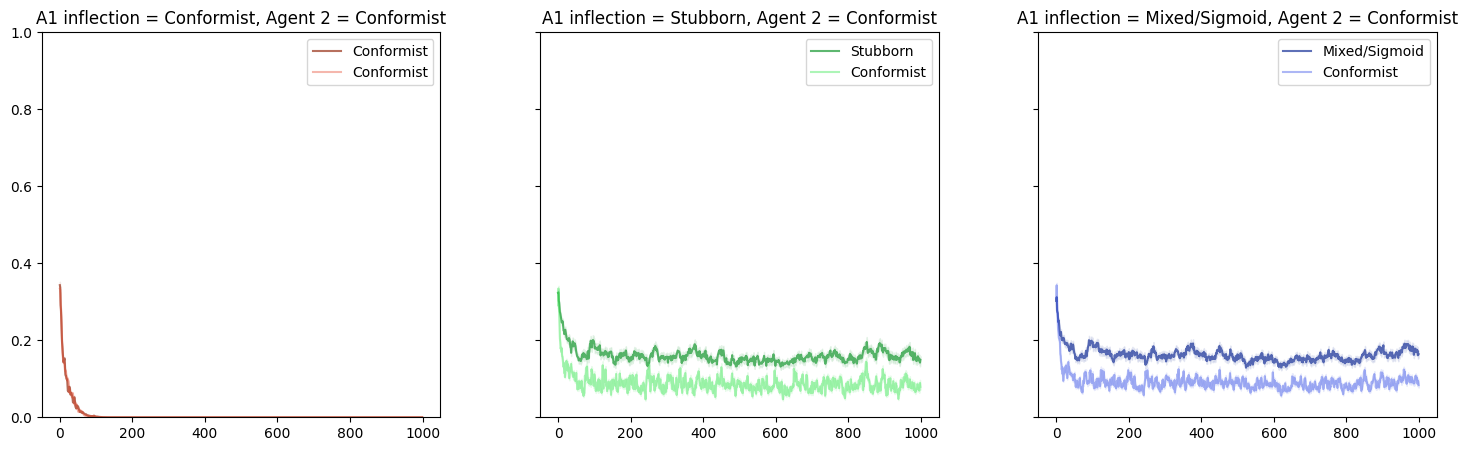

In [76]:
np.random.seed(37)
w = 6; h = 5
ncols = 3
nrows = 1
param_vals = [i for i in range(0, ncols*nrows)]
tups = list(it.product(range(nrows), range(ncols)))
agents_label = ["Conformist", "Stubborn", "Mixed/Sigmoid"]
agents1 = [conformist2, stubborn, sigmoid_8_6]
agents2 = [conformist1, conformist1, conformist1]
fig, ax = plt.subplots(nrows, ncols, figsize=(w*ncols, h*nrows), dpi=100,
                       sharey=True)#, sharex=True)
plt.subplots_adjust(wspace=0.25,hspace=0.45)
experiments = 10
trials = 1000
time = [i for i in range(trials)]


color1 = [0.6,0.2,0.1, 0.7]
color1c = [0.9,0.3,0.2, 0.4]
color2 = [0.1,0.6,0.2, 0.7]
color2c = [0.2,0.9,0.3, 0.4]
color3 = [0.1,0.2,0.6, 0.7]
color3c = [0.2,0.3,0.9, 0.4]
colors = [color1,color2,color3]
colors_c = [color1c,color2c,color3c]

agent1_pref_errors = []
agent2_pref_errors = []
agent1_errors = []
agent2_errors = []
for ix, param in enumerate(param_vals):
    for e in range(experiments):
        
# for ix, param in enumerate(param_vals):
    # experiments
      behav_1 = np.random.rand(1,1)[0]
      behav_2 = np.random.rand(1,1)[0]
      R1 = np.random.rand(1,1)[0]
      R2 = np.random.rand(1,1)[0]
      b1 = np.random.rand(1,1)[0]
      b2 = np.random.rand(1,1)[0]
      conformist1 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_true,
      controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
      system_estimate=A1, reference=R1, init_behavior=behav_1)

      conformist2 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_true,
      controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
      system_estimate=A1, reference=R1, init_behavior=behav_1)

      stubborn = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_false,
      controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B2, 
      system_estimate=A2, reference=R2, init_behavior=behav_2)

      sigmoid_8_6 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_sigmoid,
      controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
      system_estimate=A1, reference=R1, init_behavior=behav_1)

      plant1 = Plant(transition_matrix=T1, transition_function=transition, state=np.random.rand(1, 10))
      plant2 = Plant(transition_matrix=T2, transition_function=transition, state=np.random.rand(1, 10))

      # b1 = np.random.rand(1, 10)
      # b2 = np.random.rand(1, 10)

      agent1 = agents1[param]
      agent2 = agents2[0]
      agent1_error = []
      agent2_error = []
      agent1_pref_error = []
      agent2_pref_error = []
      for t in range(trials):
          color1 = [0.1,0.2,0.8, (t+1)/(trials+1)]
          color2 = [0.1,0.8,0.2, (t+1)/(trials+1)]
          #pl.scatter(agent1.get_reference()[0],-0.03, c=color1, edgecolors=[0.8,0.1,0.1, color1[1]])
          #pl.scatter(agent2.get_reference()[0],0, c=color2, edgecolors=[0.8,0.1,0.1, color2[3]], linewidth=1.5)
          b1_control = agent1.go(b2)   
          b2_control = agent2.go(b1)

          # agent1_control.append(agent1.get_output())
          # agent2_control.append(agent2.get_output())

          b1 = plant1.transition(b1_control)
          b2 = plant2.transition(b2_control)
          
          # agent1_behaviors.append(b1)
          # agent2_behaviors.append(b2)

          # agent1_error.append(np.absolute(agent1.get_error()))
          # agent2_error.append(np.absolute(agent2.get_error()))
          agent1_error.append(np.sum(np.absolute(agent1.get_error()[0]))/len(agent1.get_error()[0]))
          agent2_error.append(np.sum(np.absolute(agent2.get_error()[0]))/len(agent2.get_error()[0]))
          agent1_pref_error.append(np.sum(np.absolute(R2-b1))/len(agent1.get_error()[0]))
          agent2_pref_error.append(np.sum(np.absolute(R1-b2))/len(agent2.get_error()[0]))

        # agent1_reference.append(agent1.get_reference()[0])
        # agent2_reference.append(agent2.get_reference()[0])
      agent1_errors.append(agent1_error)
      agent2_errors.append(agent2_error)
      agent1_pref_errors.append(agent1_pref_error)
      agent2_pref_errors.append(agent2_pref_error)

    error1_mat = np.array(agent1_errors)
    error2_mat = np.array(agent2_errors)
    pref_error1_mat = np.array(agent1_pref_errors)
    pref_error2_mat = np.array(agent2_pref_errors)

    mean_error1 = np.average(error1_mat, axis=0)
    mean_error2 = np.average(error2_mat, axis=0)
    mean_pref_error1 = np.average(pref_error1_mat, axis=0)
    mean_pref_error2 = np.average(pref_error2_mat, axis=0)
    std_error1  = error1_mat.std(0)
    std_error2  = error2_mat.std(0)
    std_pref_error1  = pref_error1_mat.std(0)
    std_pref_error2  = pref_error2_mat.std(0)
    t = [n for n in range(trials)]
    ci1 = 1.96 * std_error1/np.sqrt(trials)
    ci2 = 1.96 * std_error2/np.sqrt(trials)
    pref_ci1 = 1.96 * std_pref_error1/np.sqrt(trials)
    pref_ci2 = 1.96 * std_pref_error2/np.sqrt(trials)

    upper1 = mean_error1+ci1
    lower1 = mean_error1-ci1
    upper1 = upper1.reshape(trials,)
    lower1 = lower1.reshape(trials,)
    upper2 = mean_error2+ci2
    lower2 = mean_error2-ci2
    upper2 = upper2.reshape(trials,)
    lower2 = lower2.reshape(trials,)

    pref_upper1 = mean_pref_error1+pref_ci1
    pref_lower1 = mean_pref_error1-pref_ci1
    pref_upper1 = pref_upper1.reshape(trials,)
    pref_lower1 = pref_lower1.reshape(trials,)
    pref_upper2 = mean_pref_error2+pref_ci2
    pref_lower2 = mean_pref_error2-pref_ci2
    pref_upper2 = pref_upper2.reshape(trials,)
    pref_lower2 = pref_lower2.reshape(trials,)
    
    ai = tups[ix][1]
    color = colors[param]
    color_c = colors_c[param]
    # plots
    ax[ai].plot(time, mean_error1, color=color,label=agents_label[param])
    ax[ai].plot(time, mean_error2, color=color_c, label="Conformist")
    ax[ai].fill_between(t, lower1, upper1, color=color, alpha=.1)
    ax[ai].fill_between(t, lower2, upper2, color=color_c, alpha=.1)
    # ax[ai].plot(time, agent1_error, color=color, label=agents_label[param])
    # ax[ai].plot(time, agent2_error, color=color_c, label="Conformist")
    ax[ai].set_title('A1 inflection = {}, Agent 2 = Conformist'.format(agents_label[param]))
    ax[ai].legend()
    # ax[ai].set_xlim(0,t)
    ax[ai].set_ylim(0,1)
    ax[ai].tick_params(axis='x')
    ax[ai].tick_params(axis='y')
    print("Mean Conformist Error at final timestep: ", mean_error2[-1])
    print("Mean {} Error at final timestep: {}".format(agents_label[param], mean_error1[-1]))

print("\n Sigmoid Model Agents (Error Relative to Expectation)")
# print("Agent 1 base reference: {}".format(R1))
# print("Agent 2 base reference: {}".format(R2))
plt.show()

Mean Conformist Error at final timestep:  0.3388957335993355
Mean Conformist Error at final timestep: 0.298638228156404
Mean Conformist Error at final timestep:  0.34595633299910034
Mean Stubborn Error at final timestep: 0.30823585934482456
Mean Conformist Error at final timestep:  0.30452625188553445
Mean Mixed/Sigmoid Error at final timestep: 0.33433894075062515

 Sigmoid Model Agents (Error Relative to Preference)


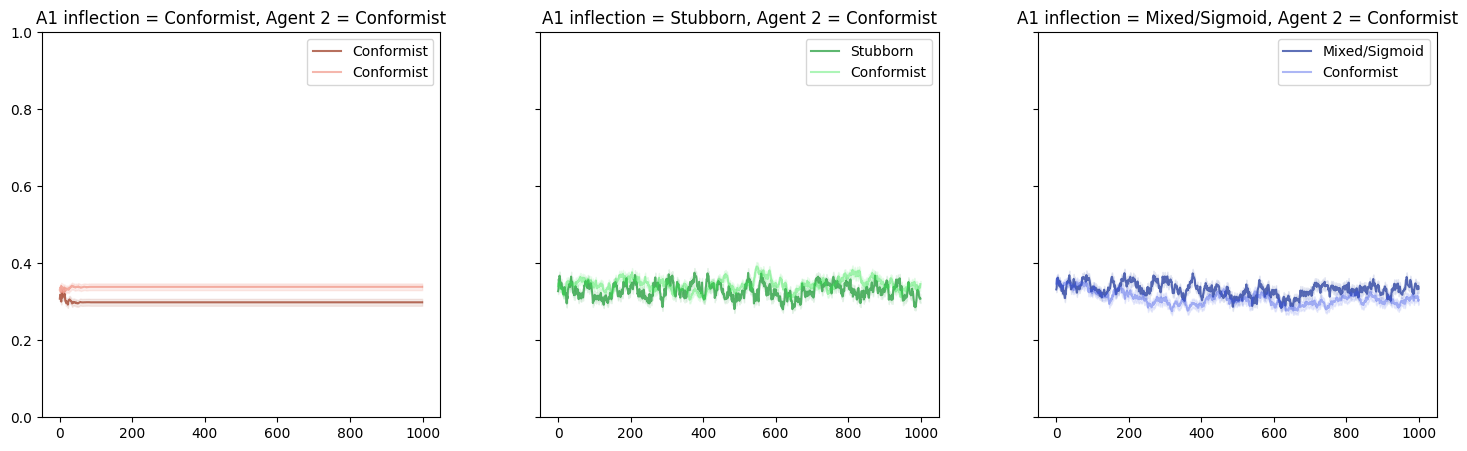

In [78]:
# np.random.seed(37)
w = 6; h = 5
ncols = 3
nrows = 1
param_vals = [i for i in range(0, ncols*nrows)]
tups = list(it.product(range(nrows), range(ncols)))
agents_label = ["Conformist", "Stubborn", "Mixed/Sigmoid"]
agents1 = [conformist2, stubborn, sigmoid_8_6]
agents2 = [conformist1, conformist1, conformist1]
fig, ax = plt.subplots(nrows, ncols, figsize=(w*ncols, h*nrows), dpi=100,
                       sharey=True)#, sharex=True)
plt.subplots_adjust(wspace=0.25,hspace=0.45)
experiments = 10
trials = 1000
time = [i for i in range(trials)]


color1 = [0.6,0.2,0.1, 0.7]
color1c = [0.9,0.3,0.2, 0.4]
color2 = [0.1,0.6,0.2, 0.7]
color2c = [0.2,0.9,0.3, 0.4]
color3 = [0.1,0.2,0.6, 0.7]
color3c = [0.2,0.3,0.9, 0.4]
colors = [color1,color2,color3]
colors_c = [color1c,color2c,color3c]

agent1_pref_errors = []
agent2_pref_errors = []
agent1_errors = []
agent2_errors = []
for ix, param in enumerate(param_vals):
    for e in range(experiments):
        
# for ix, param in enumerate(param_vals):
    # experiments
      behav_1 = np.random.rand(1,1)[0]
      behav_2 = np.random.rand(1,1)[0]
      R1 = np.random.rand(1,1)[0]
      R2 = np.random.rand(1,1)[0]
      b1 = np.random.rand(1,1)[0]
      b2 = np.random.rand(1,1)[0]
      conformist1 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_true,
      controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
      system_estimate=A1, reference=R1, init_behavior=behav_1)

      conformist2 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_true,
      controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
      system_estimate=A1, reference=R1, init_behavior=behav_1)

      stubborn = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_false,
      controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B2, 
      system_estimate=A2, reference=R2, init_behavior=behav_2)

      sigmoid_8_6 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_sigmoid,
      controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
      system_estimate=A1, reference=R1, init_behavior=behav_1)

      plant1 = Plant(transition_matrix=T1, transition_function=transition, state=np.random.rand(1, 10))
      plant2 = Plant(transition_matrix=T2, transition_function=transition, state=np.random.rand(1, 10))

      # b1 = np.random.rand(1, 10)
      # b2 = np.random.rand(1, 10)

      agent1 = agents1[param]
      agent2 = agents2[0]
      agent1_error = []
      agent2_error = []
      agent1_pref_error = []
      agent2_pref_error = []
      for t in range(trials):
          color1 = [0.1,0.2,0.8, (t+1)/(trials+1)]
          color2 = [0.1,0.8,0.2, (t+1)/(trials+1)]
          #pl.scatter(agent1.get_reference()[0],-0.03, c=color1, edgecolors=[0.8,0.1,0.1, color1[1]])
          #pl.scatter(agent2.get_reference()[0],0, c=color2, edgecolors=[0.8,0.1,0.1, color2[3]], linewidth=1.5)
          b1_control = agent1.go(b2)   
          b2_control = agent2.go(b1)

          # agent1_control.append(agent1.get_output())
          # agent2_control.append(agent2.get_output())

          b1 = plant1.transition(b1_control)
          b2 = plant2.transition(b2_control)
          
          # agent1_behaviors.append(b1)
          # agent2_behaviors.append(b2)

          # agent1_error.append(np.absolute(agent1.get_error()))
          # agent2_error.append(np.absolute(agent2.get_error()))
          agent1_error.append(np.sum(np.absolute(agent1.get_error()[0]))/len(agent1.get_error()[0]))
          agent2_error.append(np.sum(np.absolute(agent2.get_error()[0]))/len(agent2.get_error()[0]))
          agent1_pref_error.append(np.sum(np.absolute(R2-b1))/len(agent1.get_error()[0]))
          agent2_pref_error.append(np.sum(np.absolute(R1-b2))/len(agent2.get_error()[0]))

        # agent1_reference.append(agent1.get_reference()[0])
        # agent2_reference.append(agent2.get_reference()[0])
      agent1_errors.append(agent1_error)
      agent2_errors.append(agent2_error)
      agent1_pref_errors.append(agent1_pref_error)
      agent2_pref_errors.append(agent2_pref_error)

    error1_mat = np.array(agent1_errors)
    error2_mat = np.array(agent2_errors)
    pref_error1_mat = np.array(agent1_pref_errors)
    pref_error2_mat = np.array(agent2_pref_errors)

    mean_error1 = np.average(error1_mat, axis=0)
    mean_error2 = np.average(error2_mat, axis=0)
    mean_pref_error1 = np.average(pref_error1_mat, axis=0)
    mean_pref_error2 = np.average(pref_error2_mat, axis=0)
    std_error1  = error1_mat.std(0)
    std_error2  = error2_mat.std(0)
    std_pref_error1  = pref_error1_mat.std(0)
    std_pref_error2  = pref_error2_mat.std(0)
    t = [n for n in range(trials)]
    ci1 = 1.96 * std_error1/np.sqrt(trials)
    ci2 = 1.96 * std_error2/np.sqrt(trials)
    pref_ci1 = 1.96 * std_pref_error1/np.sqrt(trials)
    pref_ci2 = 1.96 * std_pref_error2/np.sqrt(trials)

    upper1 = mean_error1+ci1
    lower1 = mean_error1-ci1
    upper1 = upper1.reshape(trials,)
    lower1 = lower1.reshape(trials,)
    upper2 = mean_error2+ci2
    lower2 = mean_error2-ci2
    upper2 = upper2.reshape(trials,)
    lower2 = lower2.reshape(trials,)

    pref_upper1 = mean_pref_error1+pref_ci1
    pref_lower1 = mean_pref_error1-pref_ci1
    pref_upper1 = pref_upper1.reshape(trials,)
    pref_lower1 = pref_lower1.reshape(trials,)
    pref_upper2 = mean_pref_error2+pref_ci2
    pref_lower2 = mean_pref_error2-pref_ci2
    pref_upper2 = pref_upper2.reshape(trials,)
    pref_lower2 = pref_lower2.reshape(trials,)
    
    ai = tups[ix][1]
    color = colors[param]
    color_c = colors_c[param]
    # plots
    ax[ai].plot(time, mean_pref_error1, color=color,label=agents_label[param])
    ax[ai].plot(time, mean_pref_error2, color=color_c, label="Conformist")
    ax[ai].fill_between(t, pref_lower1, pref_upper1, color=color, alpha=.1)
    ax[ai].fill_between(t, pref_lower2, pref_upper2, color=color_c, alpha=.1)
    # ax[ai].plot(time, agent1_error, color=color, label=agents_label[param])
    # ax[ai].plot(time, agent2_error, color=color_c, label="Conformist")
    ax[ai].set_title('A1 inflection = {}, Agent 2 = Conformist'.format(agents_label[param]))
    ax[ai].legend()
    # ax[ai].set_xlim(0,t)
    ax[ai].set_ylim(0,1)
    ax[ai].tick_params(axis='x')
    ax[ai].tick_params(axis='y')
    print("Mean Conformist Error at final timestep: ", mean_pref_error2[-1])
    print("Mean {} Error at final timestep: {}".format(agents_label[param], mean_pref_error1[-1]))

print("\n Sigmoid Model Agents (Error Relative to Preference)")
# print("Agent 1 base reference: {}".format(R1))
# print("Agent 2 base reference: {}".format(R2))
plt.show()


 Sigmoid Model Agents (Error Relative to PREFERENCE)


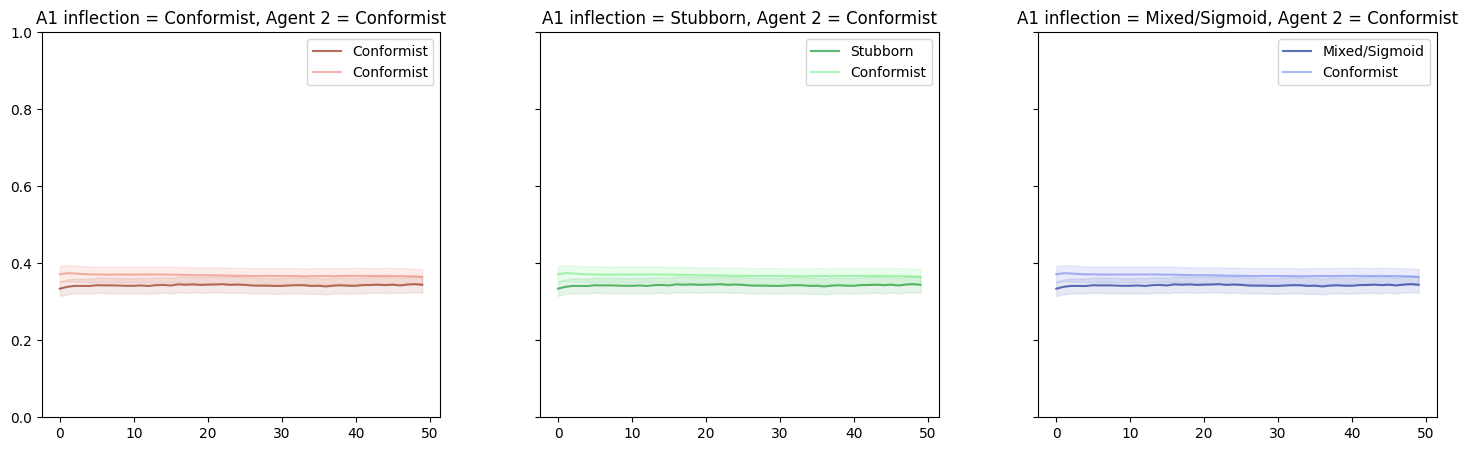

In [ ]:

w = 6; h = 5
ncols = 3
nrows = 1
param_vals = [i for i in range(0, ncols*nrows)]
tups = list(it.product(range(nrows), range(ncols)))
agents_label = ["Conformist", "Stubborn", "Mixed/Sigmoid"]
agents1 = [conformist2, stubborn, sigmoid_8_6]
agents2 = [conformist1, conformist1, conformist1]
fig, ax = plt.subplots(nrows, ncols, figsize=(w*ncols, h*nrows), dpi=100,
                       sharey=True)#, sharex=True)
plt.subplots_adjust(wspace=0.25,hspace=0.45)
trials = 50
time = [i for i in range(trials)]


color1 = [0.6,0.2,0.1, 0.7]
color1c = [0.9,0.3,0.2, 0.4]
color2 = [0.1,0.6,0.2, 0.7]
color2c = [0.2,0.9,0.3, 0.4]
color3 = [0.1,0.2,0.6, 0.7]
color3c = [0.2,0.3,0.9, 0.4]
colors = [color1,color2,color3]
colors_c = [color1c,color2c,color3c]

for ix, param in enumerate(param_vals):
    ai = tups[ix][1]
    color = colors[param]
    color_c = colors_c[param]
    # plots
    ax[ai].plot(time, mean_pref_error1, color=color,label=agents_label[param])
    ax[ai].plot(time, mean_pref_error2, color=color_c, label="Conformist")
    ax[ai].fill_between(t, pref_lower1, pref_upper1, color=color, alpha=.1)
    ax[ai].fill_between(t, pref_lower2, pref_upper2, color=color_c, alpha=.1)
    ax[ai].set_title('A1 inflection = {}, Agent 2 = Conformist'.format(agents_label[param]))
    ax[ai].legend()
    # ax[ai].set_xlim(0,t)
    ax[ai].set_ylim(0,1)
    ax[ai].tick_params(axis='x')
    ax[ai].tick_params(axis='y')

print("\n Sigmoid Model Agents (Error Relative to PREFERENCE)")